# Quais jogadores são mais afetados pela pressão?

O objetivo desse notebook é analisar quais os jogadores mais afetadas pela pressão de decidir jogos durante a temporada regular da NBA.
Para isso, usou-se dados do [StatHead](stathead.com) a fim de comparar o desempenho no lance livre no final de jogos disputados (menos de cinco minutos do 4º quarto com uma diferença de menos de 5 pontos ou prorrogação) com o desempenho médio do jogador durante a temporada.

# Setup

In [1]:
# Bibliotecas
## Dados
import pandas as pd
import numpy as np

## Visualizações
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

In [2]:
# Definindo caminhos
caminho_dados = "/Users/vinicius/Documents/Python/Data Science/Projetos Machine Learning/Pressao_Lance_Livre/data/"
caminho_dados_ll = f"{caminho_dados}fta_4th_5_ot/"
caminho_dados_todos_jogadores = f"{caminho_dados}ft%_season_all_players/"

# Leitura dos Dados

## Estatística da Temporada

Vamos analisar as estatísticas de lance livre de todos os jogadores da NBA que tentaram ao menos um arremesso da "linha da caridade" na temporada regular 2022-23. 

Para análises mais direcionadas, vamos olhar para um *subset* desses dados: jogadores que jogaram ao menos metade dos jogos (41) e que arremessaram pelo menos um lance livre por jogo.

In [3]:
## Nome do arquivo
arquivo_dados_temporada = "stats_22_23_season_1fta_41g.xlsx"

## Leitura
df_temporada = pd.read_excel(f"{caminho_dados}{arquivo_dados_temporada}")

# Visualizando
df_temporada.head(5)

,Rk,Player,FT%,G,Season,Age,Team,G.1,GS,MP,...,TOV,PF,PTS,FG%,2P%,3P%,FT%.1,TS%,eFG%,Pos
0,1,Tyler Herro,0.934,67,2022-23,23,MIA,67,67,2337,...,158,101,1347,0.439,0.497,0.378,0.934,0.566,0.531,G
1,2,Kevin Durant,0.919,47,2022-23,34,"BRK,PHO",47,47,1672,...,156,99,1366,0.560,0.617,0.404,0.919,0.677,0.614,F-G
2,3,Edmond Sumner,0.917,53,2022-23,27,BRK,53,12,736,...,50,83,378,0.461,0.511,0.356,0.917,0.597,0.519,G
3,4,Stephen Curry,0.915,56,2022-23,34,GSW,56,56,1941,...,179,117,1648,0.493,0.579,0.427,0.915,0.656,0.614,G
4,5,Damian Lillard,0.914,58,2022-23,32,POR,58,58,2107,...,191,109,1866,0.463,0.574,0.371,0.914,0.645,0.564,G


In [4]:
# Lendo dados do % de lance livre de todos os jogadores
## Nomes dos arquivos
arquivos_jogadores = [f"sportsref_download ({i}).xls" for i in range(1, 4)]

## Leitura
for num, arquivo in enumerate(arquivos_jogadores):
    # Lendo
    df = pd.read_html(f"{caminho_dados_todos_jogadores}{arquivo}")

    # Transformando em uma array bidimensional e, depois, em um dataframe
    df = np.array(df).squeeze()
    df = pd.DataFrame(df)
    
    # Concatenando
    if num == 0:
        df_temporada_todos = df
    else:
        df_temporada_todos = pd.concat([df_temporada_todos, df])

In [5]:
# Ajustando nomes das colunas
df_temporada_todos.rename(columns=dict(zip(df_temporada_todos.columns, df_temporada.columns)), inplace=True)
df_temporada_todos.sort_values(by=['Rk'], inplace=True)

# Visualizando
df_temporada_todos.head()

,Rk,Player,FT%,G,Season,Age,Team,G.1,GS,MP,...,TOV,PF,PTS,FG%,2P%,3P%,FT%.1,TS%,eFG%,Pos
0,1,Buddy Boeheim,1.0,2,2022-23,23,DET,10,0,90,...,0,6,16,0.185,0.5,0.16,1.0,0.287,0.259,G
1,2,Tony Bradley,1.0,4,2022-23,25,CHI,12,0,33,...,1,2,19,0.5,0.429,0.6,1.0,0.69,0.625,F-C
2,3,Jarrell Brantley,1.0,2,2022-23,26,UTA,4,0,39,...,2,3,22,0.571,0.8,0.444,1.0,0.739,0.714,F
3,4,Vernon Carey Jr.,1.0,2,2022-23,21,WAS,11,0,28,...,2,5,6,0.25,0.25,NaN,1.0,0.338,0.25,C
4,5,Darius Days,1.0,2,2022-23,23,HOU,4,0,25,...,0,2,15,0.417,1.0,0.3,1.0,0.582,0.542,F


## Lances Livres 'Decisivos'

O *clutch time* (ou "tempo decisivo") costuma ser definido como os últimos 5 minutos do 4º quarto em que a diferença do jogo está em 5 pontos ou menos.

Usando o StatHead, coletamos os lances livres cobrados no 4º quarto cuja diferença estava em menos de 5 pontos ou na prorrogação.

In [6]:
# Lendo dados dos lances livres (LL) 'decisivos'
## Nomes dos arquivos
arquivos_ll = [f"sportsref_download ({i}).xls" for i in range(2, 65)]

## Leitura
for num, arquivo in enumerate(arquivos_ll):
    # Lendo
    df = pd.read_html(f"{caminho_dados_ll}{arquivo}")

    # Transformando em uma array bidimensional e, depois, em um dataframe
    df = np.array(df).squeeze()
    df = pd.DataFrame(df)
    
    # Concatenando
    if num == 0:
        df_ll = df
    else:
        df_ll = pd.concat([df_ll, df])

In [7]:
# Removendo eventuais linhas duplicadas por erro de coleta
df_ll.drop_duplicates(inplace=True, ignore_index=True)

# Ajustando colunas
df_ll = df_ll[[2, 3, 4, 5, 6, 7, 8, 9]]
nomes_colunas = ['team', 'at', 'opponent', 'quarter', 'time', 'score_before', 'description', 'score_after']
df_ll.rename(columns=dict(zip(range(2, 10), nomes_colunas)), inplace=True)

# Visualizando
df_ll.head()

,team,at,opponent,quarter,time,score_before,description,score_after
0,PHI,NaN,MIL,4th,0:32.0,PHI tied (86-86),P. Tucker makes free throw 1 of 2,PHI up 1 (87-86)
1,PHI,NaN,MIL,4th,0:32.0,PHI up 1 (87-86),P. Tucker makes free throw 2 of 2,PHI up 2 (88-86)
2,PHI,NaN,SAS,4th,9:21.0,PHI down 3 (82-85),J. Embiid makes free throw 1 of 2,PHI down 2 (83-85)
3,PHI,NaN,SAS,4th,9:21.0,PHI down 2 (83-85),J. Embiid makes free throw 2 of 2,PHI down 1 (84-85)
4,PHI,@,CHI,4th,11:44.0,PHI up 3 (90-87),J. Harden makes free throw 1 of 2,PHI up 4 (91-87)


# Limpeza

O objetivo aqui é, a partir dos dados por lance livre, obter um DataFrame por jogador com o seu % de lance livre no *clutch time* e segmentar esse % em dentro/fora de casa e se o seu time estava ganhando ou perdendo.

## Criação de Colunas

In [8]:
# A primeira coisa a se fazer é limitar os nossos dados apenas para os últimos 5 minutos do jogo, e não de todo o 4º quarto
## Mudando o tipo da coluna para datetime
df_ll['time'] = pd.to_datetime(df_ll['time'].str[:-2], format='%M:%S')

## Vendo quanto tempo falta para o final do jogo
df_ll['time'] = df_ll['time'] - df_ll['time'].min()

## Filtrando os dados para o clutch time
df_ll = df_ll[df_ll['time'] < pd.Timedelta(minutes=5)]

In [9]:
# Vamos isolar o nome do jogador do campo 'description'
## Para isso, vamos separar o campo por espaço e juntar os dois primeiros elementos (que formam o nome do jogador)
df_ll['player_name'] = df_ll['description'].str.split().str[0] + ' ' + df_ll['description'].str.split().str[1]

df_ll.head(10)

,team,at,opponent,quarter,time,score_before,description,score_after,player_name
0,PHI,NaN,MIL,4th,0 days 00:00:32,PHI tied (86-86),P. Tucker makes free throw 1 of 2,PHI up 1 (87-86),P. Tucker
1,PHI,NaN,MIL,4th,0 days 00:00:32,PHI up 1 (87-86),P. Tucker makes free throw 2 of 2,PHI up 2 (88-86),P. Tucker
6,PHI,@,CHI,4th,0 days 00:03:16,PHI down 2 (105-107),J. Harden makes free throw 1 of 2,PHI down 1 (106-107),J. Harden
7,PHI,@,CHI,4th,0 days 00:03:16,PHI down 1 (106-107),J. Harden makes free throw 2 of 2,PHI tied (107-107),J. Harden
8,PHI,@,CHI,4th,0 days 00:02:31,PHI tied (107-107),J. Harden makes free throw 1 of 2,PHI up 1 (108-107),J. Harden
9,PHI,@,CHI,4th,0 days 00:02:31,PHI up 1 (108-107),J. Harden makes free throw 2 of 2,PHI up 2 (109-107),J. Harden
10,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 1 of 2,PHI tied (109-109),J. Embiid
11,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 2 of 2,PHI tied (109-109),J. Embiid
12,PHI,@,CHI,4th,0 days 00:00:04,PHI up 3 (112-109),T. Harris makes free throw 1 of 2,PHI up 4 (113-109),T. Harris
13,PHI,@,CHI,4th,0 days 00:00:04,PHI up 4 (113-109),T. Harris makes free throw 2 of 2,PHI up 5 (114-109),T. Harris


In [10]:
# Vamos determinar se o lance livre foi feito ou não
df_ll["ft_made"] = df_ll['description'].str.contains('makes')

df_ll.head(10)

,team,at,opponent,quarter,time,score_before,description,score_after,player_name,ft_made
0,PHI,NaN,MIL,4th,0 days 00:00:32,PHI tied (86-86),P. Tucker makes free throw 1 of 2,PHI up 1 (87-86),P. Tucker,True
1,PHI,NaN,MIL,4th,0 days 00:00:32,PHI up 1 (87-86),P. Tucker makes free throw 2 of 2,PHI up 2 (88-86),P. Tucker,True
6,PHI,@,CHI,4th,0 days 00:03:16,PHI down 2 (105-107),J. Harden makes free throw 1 of 2,PHI down 1 (106-107),J. Harden,True
7,PHI,@,CHI,4th,0 days 00:03:16,PHI down 1 (106-107),J. Harden makes free throw 2 of 2,PHI tied (107-107),J. Harden,True
8,PHI,@,CHI,4th,0 days 00:02:31,PHI tied (107-107),J. Harden makes free throw 1 of 2,PHI up 1 (108-107),J. Harden,True
9,PHI,@,CHI,4th,0 days 00:02:31,PHI up 1 (108-107),J. Harden makes free throw 2 of 2,PHI up 2 (109-107),J. Harden,True
10,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 1 of 2,PHI tied (109-109),J. Embiid,False
11,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 2 of 2,PHI tied (109-109),J. Embiid,False
12,PHI,@,CHI,4th,0 days 00:00:04,PHI up 3 (112-109),T. Harris makes free throw 1 of 2,PHI up 4 (113-109),T. Harris,True
13,PHI,@,CHI,4th,0 days 00:00:04,PHI up 4 (113-109),T. Harris makes free throw 2 of 2,PHI up 5 (114-109),T. Harris,True


In [11]:
# Se o jogador estava jogando fora ou dentro de casa
## Alterando a coluna de 'at' para eliminar NaN
df_ll['at'].replace([np.nan], ['vs'], inplace=True)

## Criando a coluna
df_ll['home_away'] = df_ll['at'].str.contains('@')
df_ll['home_away'].replace([True, False], ['away', 'home'], inplace=True)

df_ll.head(10)

,team,at,opponent,quarter,time,score_before,description,score_after,player_name,ft_made,home_away
0,PHI,vs,MIL,4th,0 days 00:00:32,PHI tied (86-86),P. Tucker makes free throw 1 of 2,PHI up 1 (87-86),P. Tucker,True,home
1,PHI,vs,MIL,4th,0 days 00:00:32,PHI up 1 (87-86),P. Tucker makes free throw 2 of 2,PHI up 2 (88-86),P. Tucker,True,home
6,PHI,@,CHI,4th,0 days 00:03:16,PHI down 2 (105-107),J. Harden makes free throw 1 of 2,PHI down 1 (106-107),J. Harden,True,away
7,PHI,@,CHI,4th,0 days 00:03:16,PHI down 1 (106-107),J. Harden makes free throw 2 of 2,PHI tied (107-107),J. Harden,True,away
8,PHI,@,CHI,4th,0 days 00:02:31,PHI tied (107-107),J. Harden makes free throw 1 of 2,PHI up 1 (108-107),J. Harden,True,away
9,PHI,@,CHI,4th,0 days 00:02:31,PHI up 1 (108-107),J. Harden makes free throw 2 of 2,PHI up 2 (109-107),J. Harden,True,away
10,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 1 of 2,PHI tied (109-109),J. Embiid,False,away
11,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 2 of 2,PHI tied (109-109),J. Embiid,False,away
12,PHI,@,CHI,4th,0 days 00:00:04,PHI up 3 (112-109),T. Harris makes free throw 1 of 2,PHI up 4 (113-109),T. Harris,True,away
13,PHI,@,CHI,4th,0 days 00:00:04,PHI up 4 (113-109),T. Harris makes free throw 2 of 2,PHI up 5 (114-109),T. Harris,True,away


In [12]:
## Se o time do jogado estava perdendo ou vencendendo/empatando
df_ll['losing_winning'] = df_ll['score_before'].str.contains('down')
df_ll['losing_winning'].replace([True, False], ['losing', 'tied_winning'], inplace=True)

df_ll.head(10)

,team,at,opponent,quarter,time,score_before,description,score_after,player_name,ft_made,home_away,losing_winning
0,PHI,vs,MIL,4th,0 days 00:00:32,PHI tied (86-86),P. Tucker makes free throw 1 of 2,PHI up 1 (87-86),P. Tucker,True,home,tied_winning
1,PHI,vs,MIL,4th,0 days 00:00:32,PHI up 1 (87-86),P. Tucker makes free throw 2 of 2,PHI up 2 (88-86),P. Tucker,True,home,tied_winning
6,PHI,@,CHI,4th,0 days 00:03:16,PHI down 2 (105-107),J. Harden makes free throw 1 of 2,PHI down 1 (106-107),J. Harden,True,away,losing
7,PHI,@,CHI,4th,0 days 00:03:16,PHI down 1 (106-107),J. Harden makes free throw 2 of 2,PHI tied (107-107),J. Harden,True,away,losing
8,PHI,@,CHI,4th,0 days 00:02:31,PHI tied (107-107),J. Harden makes free throw 1 of 2,PHI up 1 (108-107),J. Harden,True,away,tied_winning
9,PHI,@,CHI,4th,0 days 00:02:31,PHI up 1 (108-107),J. Harden makes free throw 2 of 2,PHI up 2 (109-107),J. Harden,True,away,tied_winning
10,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 1 of 2,PHI tied (109-109),J. Embiid,False,away,tied_winning
11,PHI,@,CHI,4th,0 days 00:01:01,PHI tied (109-109),J. Embiid misses free throw 2 of 2,PHI tied (109-109),J. Embiid,False,away,tied_winning
12,PHI,@,CHI,4th,0 days 00:00:04,PHI up 3 (112-109),T. Harris makes free throw 1 of 2,PHI up 4 (113-109),T. Harris,True,away,tied_winning
13,PHI,@,CHI,4th,0 days 00:00:04,PHI up 4 (113-109),T. Harris makes free throw 2 of 2,PHI up 5 (114-109),T. Harris,True,away,tied_winning


## Dados por Jogador no *Clutch Time*

In [13]:
# Criando DataFrame por jogador com total de acertos e %
df_jogadores_ll_geral = df_ll.groupby(['player_name', 'team']).ft_made.agg(
    ft_made = 'sum', ft_percentage = 'mean'
)

# Total de lances livres tentados
df_jogadores_ll_geral['total_ft'] = df_jogadores_ll_geral['ft_made'] / df_jogadores_ll_geral['ft_percentage']
df_jogadores_ll_geral

,,ft_made,ft_percentage,total_ft
player_name,team,,,
A. Burks,DET,12,0.800000,15.0
A. Caruso,CHI,1,0.500000,2.0
A. Coffey,LAC,1,1.000000,1.0
A. Davis,LAL,20,0.645161,31.0
A. Dosunmu,CHI,3,0.750000,4.0
...,...,...,...,...
Y. Watanabe,BRK,1,0.500000,2.0
Z. Collins,SAS,12,0.705882,17.0
Z. LaVine,CHI,29,0.878788,33.0


In [14]:
# Dentro/fora de casa
df_jogadores_ll_casa = df_ll.groupby(['player_name', 'team', 'home_away']).ft_made.agg(
    ft_made = 'sum', ft_percentage = 'mean'
)

# Total de lances livres tentados
df_jogadores_ll_casa['total_ft'] = df_jogadores_ll_casa['ft_made'] / df_jogadores_ll_casa['ft_percentage']

# Ajustando formatos
df_jogadores_ll_casa = df_jogadores_ll_casa.unstack()
df_jogadores_ll_casa

ft_made       ft_percentage           total_ft      
home_away             away  home          away      home     away  home
player_name   team                                                     
A. Burks      DET      8.0   4.0      0.800000  0.800000     10.0   5.0
A. Caruso     CHI      NaN   1.0           NaN  0.500000      NaN   2.0
A. Coffey     LAC      NaN   1.0           NaN  1.000000      NaN   1.0
A. Davis      LAL     10.0  10.0      0.625000  0.666667     16.0  15.0
A. Dosunmu    CHI      2.0   1.0      1.000000  0.500000      2.0   2.0
...                    ...   ...           ...       ...      ...   ...
Y. Watanabe   BRK      1.0   NaN      0.500000       NaN      2.0   NaN
Z. Collins    SAS      9.0   3.0      0.642857  1.000000     14.0   3.0
Z. LaVine     CHI     17.0  12.0      0.944444  0.800000     18.0  15.0
Z. Nnaji      DEN      1.0   2.0      0.500000  0.333333      2.0   6.0
Z. Williamson NOP      4.0   6.0      0.800000  0.666667      5.0   9.0

[323 rows x 6 columns]

In [15]:
# Perdendo ou ganhando/empatando
df_jogadores_ll_perdendo = df_ll.groupby(['player_name', 'team', 'losing_winning']).ft_made.agg(
    ft_made = 'sum', ft_percentage = 'mean'
)

# Total de lances livres tentados
df_jogadores_ll_perdendo['total_ft'] = df_jogadores_ll_perdendo['ft_made'] / df_jogadores_ll_perdendo['ft_percentage']

# Ajustando formatos
df_jogadores_ll_perdendo = df_jogadores_ll_perdendo.unstack()
df_jogadores_ll_perdendo

ft_made              ft_percentage              total_ft  \
losing_winning      losing tied_winning        losing tied_winning   losing   
player_name   team                                                            
A. Burks      DET      6.0          6.0      0.750000     0.857143      8.0   
A. Caruso     CHI      1.0          NaN      0.500000          NaN      2.0   
A. Coffey     LAC      NaN          1.0           NaN     1.000000      NaN   
A. Davis      LAL      4.0         16.0      1.000000     0.592593      4.0   
A. Dosunmu    CHI      1.0          2.0      0.500000     1.000000      2.0   
...                    ...          ...           ...          ...      ...   
Y. Watanabe   BRK      NaN          1.0           NaN     0.500000      NaN   
Z. Collins    SAS      3.0          9.0      0.600000     0.750000      5.0   
Z. LaVine     CHI     15.0         14.0      0.833333     0.933333     18.0   
Z. Nnaji      DEN      2.0          1.0      0.333333     0.500000      6.0   
Z. Williamson NOP      4.0          6.0      1.000000     0.600000      4.0   

                                 
losing_winning     tied_winning  
player_name   team               
A. Burks      DET           7.0  
A. Caruso     CHI           NaN  
A. Coffey     LAC           1.0  
A. Davis      LAL          27.0  
A. Dosunmu    CHI           2.0  
...                         ...  
Y. Watanabe   BRK           2.0  
Z. Collins    SAS          12.0  
Z. LaVine     CHI          15.0  
Z. Nnaji      DEN           2.0  
Z. Williamson NOP          10.0  

[323 rows x 6 columns]

In [16]:
# Colapsando os nomes de colunas
df_jogadores_ll_casa.columns = ['_'.join(col) for col in df_jogadores_ll_casa.columns.values]
df_jogadores_ll_perdendo.columns = ['_'.join(col) for col in df_jogadores_ll_perdendo.columns.values]

df_jogadores_ll_perdendo.head(5)

,,ft_made_losing,ft_made_tied_winning,ft_percentage_losing,ft_percentage_tied_winning,total_ft_losing,total_ft_tied_winning
player_name,team,,,,,,
A. Burks,DET,6.0,6.0,0.75,0.857143,8.0,7.0
A. Caruso,CHI,1.0,NaN,0.50,NaN,2.0,NaN
A. Coffey,LAC,NaN,1.0,NaN,1.000000,NaN,1.0
A. Davis,LAL,4.0,16.0,1.00,0.592593,4.0,27.0
A. Dosunmu,CHI,1.0,2.0,0.50,1.000000,2.0,2.0


In [17]:
# Juntando todos os dataframes
df_jogadores_ll = pd.concat([df_jogadores_ll_geral, df_jogadores_ll_casa, df_jogadores_ll_perdendo], axis=1)

df_jogadores_ll.head(10)

,,ft_made,ft_percentage,total_ft,ft_made_away,ft_made_home,ft_percentage_away,ft_percentage_home,total_ft_away,total_ft_home,ft_made_losing,ft_made_tied_winning,ft_percentage_losing,ft_percentage_tied_winning,total_ft_losing,total_ft_tied_winning
player_name,team,,,,,,,,,,,,,,,
A. Burks,DET,12,0.800000,15.0,8.0,4.0,0.800000,0.800000,10.0,5.0,6.0,6.0,0.75,0.857143,8.0,7.0
A. Caruso,CHI,1,0.500000,2.0,NaN,1.0,NaN,0.500000,NaN,2.0,1.0,NaN,0.50,NaN,2.0,NaN
A. Coffey,LAC,1,1.000000,1.0,NaN,1.0,NaN,1.000000,NaN,1.0,NaN,1.0,NaN,1.000000,NaN,1.0
A. Davis,LAL,20,0.645161,31.0,10.0,10.0,0.625000,0.666667,16.0,15.0,4.0,16.0,1.00,0.592593,4.0,27.0
A. Dosunmu,CHI,3,0.750000,4.0,2.0,1.0,1.000000,0.500000,2.0,2.0,1.0,2.0,0.50,1.000000,2.0,2.0
A. Edwards,MIN,20,0.714286,28.0,8.0,12.0,0.666667,0.750000,12.0,16.0,3.0,17.0,0.50,0.772727,6.0,22.0
A. Gordon,DEN,11,0.550000,20.0,2.0,9.0,1.000000,0.500000,2.0,18.0,1.0,10.0,0.20,0.666667,5.0,15.0
A. Nembhard,IND,4,0.500000,8.0,2.0,2.0,0.500000,0.500000,4.0,4.0,1.0,3.0,0.50,0.500000,2.0,6.0
A. Nesmith,IND,15,0.937500,16.0,2.0,13.0,1.000000,0.928571,2.0,14.0,4.0,11.0,1.00,0.916667,4.0,12.0


## Juntando Dados e Arrumando Nomes

Para fazer uma análise comparativa, vamos juntar os dados de lance livre decisivos com os da temporada regular.
Há dois problemas: um de compatibilização de nomes e outro de nomes iguais.

In [18]:
# Selecionando colunas relevantes
df_temporada_todos = df_temporada_todos[["Player", "Age", "G.1", "Team", "FT%", "FTA", "FT"]]

# Renomeando colunas
df_temporada_todos.rename(columns=dict(zip(["Player", "Age", "G.1", "Team", "FT%", "FTA", "FT"],
                                           ["player_name", "age", "games", "team", "ft_percentage_season", "total_ft_season", "ft_made_season"])),
                          inplace=True)

In [19]:
# Arrumando os nomes para ficarem compatíveis
# Vamos colapsar o primeiro nome para a inicial e ignorar qualquer outro sufixo
df_temporada_todos['player_name'] = df_temporada_todos['player_name'].str.split().str[0].str[0] + '. ' + df_temporada_todos['player_name'].str.split().str[1]

In [20]:
# Vendo nomes duplicados
nomes_duplicados = df_temporada_todos[['player_name']].value_counts()
nomes_duplicados.head(25)

player_name   
J. Green          5
M. Morris         3
J. Williams       3
D. Mitchell       2
D. Jones          2
D. Green          2
D. Smith          2
S. Curry          2
J. Butler         2
K. Johnson        2
J. Holiday        2
T. Jones          2
J. Jackson        2
J. Johnson        2
T. Mann           2
J. McDaniels      2
B. BogdanoviÄ    2
T. Young          2
A. Wiggins        2
C. Martin         2
J. Smith          2
K. Jones          1
K. Anderson       1
M. Porter         1
K. Bates-Diop     1
dtype: int64

In [21]:
# Vendo nomes duplicados em cada time
nomes_duplicados = df_temporada_todos[['player_name', 'team']].value_counts()
nomes_duplicados.head(5)

# Apenas um caso!

player_name         team
J. Williams         OKC     2
A. Burks            DET     1
M. Carter-Williams  ORL     1
M. McClung          PHI     1
M. McBride          NYK     1
dtype: int64

In [22]:
# Vendo nomes duplicados por idade
nomes_duplicados = df_temporada_todos[['player_name', 'age']].value_counts()
nomes_duplicados.head(5)

# Apenas três casos de jogadores que não são tão importantes assim
jogadores_duplicados_idade = ["C. Martin", "D. Smith", "M. Morris"]

Para fazer a análise, precisamos ajustar os dados de jogadores trocados, que aparecem com dois times nos dados da temporada.
Inicialmente, vamos dividir esses jogadores em duas linhas e depois juntar com os nossos dados de lances livres decisivos.

In [23]:
# Selecionando os jogadores trocados
df_trocados = df_temporada_todos[df_temporada_todos['team'].str.contains(',')].copy()

# Separando os times
df_trocados['team1'] = df_trocados['team'].str.split(',').str[0]
df_trocados['team2'] = df_trocados['team'].str.split(',').str[1]

df_trocados

,player_name,age,games,team,ft_percentage_season,total_ft_season,ft_made_season,team1,team2
9,D. Green,35,11,"CLE,MEM",1.0,1,1,CLE,MEM
18,M. Morris,33,35,"BRK,DAL",1.0,10,10,BRK,DAL
24,D. Smith,25,15,"BRK,MIA",1.0,3,3,BRK,MIA
31,L. Kennard,26,59,"LAC,MEM",0.949,39,37,LAC,MEM
39,K. Durant,34,47,"BRK,PHO",0.919,334,307,BRK,PHO
...,...,...,...,...,...,...,...,...,...
75,T. Taylor,23,31,"CHI,IND",0.545,11,6,CHI,IND
76,D. Bazley,22,43,"OKC,PHO",0.543,70,38,OKC,PHO
82,J. Bouyea,23,5,"MIA,WAS",0.5,2,1,MIA,WAS
98,M. Brown,23,36,"BRK,LAC",0.458,72,33,BRK,LAC


In [24]:
# Removendo coluna original e pivottando os dados para um formato longo
df_trocados.drop(columns=['team'], inplace=True)
df_trocados = pd.melt(df_trocados, id_vars=list(df_trocados.columns)[:-2], value_vars=['team1', 'team2'])

# Ordenando por nome
df_trocados.sort_values(by='player_name', inplace=True)

# Removendo coluna de variável e renomeando
df_trocados.drop(columns=['variable'], inplace=True)
df_trocados.rename(columns={'value':'team'}, inplace=True)

df_trocados

,player_name,age,games,ft_percentage_season,total_ft_season,ft_made_season,team
67,A. Lawson,22,15,0.25,8,2,DAL
135,A. Lawson,22,15,0.25,8,2,MIN
114,B. Fernando,24,39,0.7,50,35,HOU
46,B. Fernando,24,39,0.7,50,35,ATL
16,B. Hyland,22,56,0.843,102,86,DEN
...,...,...,...,...,...,...,...
131,T. Taylor,23,31,0.545,11,6,IND
94,T. Warren,29,42,0.8,35,28,PHO
26,T. Warren,29,42,0.8,35,28,BRK
98,W. Barton,32,56,0.787,47,37,WAS


In [25]:
# Juntando o dataset principal com os dados trocados
df_temporada_todos_ajustado = pd.concat([
    df_temporada_todos[~df_temporada_todos['team'].str.contains(',')],
    df_trocados
])

# Settando index
df_temporada_todos_ajustado.set_index(['player_name', 'team'], inplace=True)

# Vendo resultado
df_temporada_todos_ajustado

age games ft_percentage_season total_ft_season ft_made_season
player_name team                                                              
B. Boeheim  DET   23    10                  1.0               2              2
T. Bradley  CHI   25    12                  1.0               4              4
J. Brantley UTA   26     4                  1.0               2              2
V. Carey    WAS   21    11                  1.0               2              2
D. Days     HOU   23     4                  1.0               2              2
...               ..   ...                  ...             ...            ...
T. Taylor   IND   23    31                0.545              11              6
T. Warren   PHO   29    42                  0.8              35             28
            BRK   29    42                  0.8              35             28
W. Barton   WAS   32    56                0.787              47             37
            TOR   32    56                0.787              47             37

[583 rows x 5 columns]

In [26]:
# Finalmente, juntando com os dados de lances livres decisivos
print(f"Nº de entradas antes: {df_jogadores_ll.shape[0]}.")
df_jogadores_ll_time = df_jogadores_ll.join(df_temporada_todos_ajustado, how='left')
print(f"Nº de entradas depois: {df_jogadores_ll_time.shape[0]}.")

df_jogadores_ll_time.head(10)
# Uma entrada a mais: o J. Williams duplicado de OKC.

Nº de entradas antes: 323.
Nº de entradas depois: 324.


,,ft_made,ft_percentage,total_ft,ft_made_away,ft_made_home,ft_percentage_away,ft_percentage_home,total_ft_away,total_ft_home,ft_made_losing,ft_made_tied_winning,ft_percentage_losing,ft_percentage_tied_winning,total_ft_losing,total_ft_tied_winning,age,games,ft_percentage_season,total_ft_season,ft_made_season
player_name,team,,,,,,,,,,,,,,,,,,,,
A. Burks,DET,12,0.800000,15.0,8.0,4.0,0.800000,0.800000,10.0,5.0,6.0,6.0,0.75,0.857143,8.0,7.0,31,51,0.814,188,153
A. Caruso,CHI,1,0.500000,2.0,NaN,1.0,NaN,0.500000,NaN,2.0,1.0,NaN,0.50,NaN,2.0,NaN,28,67,0.808,73,59
A. Coffey,LAC,1,1.000000,1.0,NaN,1.0,NaN,1.000000,NaN,1.0,NaN,1.0,NaN,1.000000,NaN,1.0,25,50,0.778,63,49
A. Davis,LAL,20,0.645161,31.0,10.0,10.0,0.625000,0.666667,16.0,15.0,4.0,16.0,1.00,0.592593,4.0,27.0,29,56,0.784,444,348
A. Dosunmu,CHI,3,0.750000,4.0,2.0,1.0,1.000000,0.500000,2.0,2.0,1.0,2.0,0.50,1.000000,2.0,2.0,23,80,0.805,82,66
A. Edwards,MIN,20,0.714286,28.0,8.0,12.0,0.666667,0.750000,12.0,16.0,3.0,17.0,0.50,0.772727,6.0,22.0,21,79,0.756,422,319
A. Gordon,DEN,11,0.550000,20.0,2.0,9.0,1.000000,0.500000,2.0,18.0,1.0,10.0,0.20,0.666667,5.0,15.0,27,68,0.608,314,191
A. Nembhard,IND,4,0.500000,8.0,2.0,2.0,0.500000,0.500000,4.0,4.0,1.0,3.0,0.50,0.500000,2.0,6.0,23,75,0.79,62,49
A. Nesmith,IND,15,0.937500,16.0,2.0,13.0,1.000000,0.928571,2.0,14.0,4.0,11.0,1.00,0.916667,4.0,12.0,23,73,0.838,142,119


In [27]:
# Resettando index
df_jogadores_ll_time.reset_index(inplace=True)

# Retirando jogadores de mesmo nome e idade (3)
df_jogadores_ll_time = df_jogadores_ll_time.query("player_name not in @jogadores_duplicados_idade")

In [28]:
# Agregando por nome e idade
## Lista de variáveis para a soma e média (manter igual)
lista_variaveis_soma = ['ft_made', 'total_ft', 'ft_made_away', 'total_ft_away', 'ft_made_home', 'total_ft_home',
                        'ft_made_losing', 'total_ft_losing', 'ft_made_tied_winning', 'total_ft_tied_winning']
lista_variaveis_media = ['ft_percentage_season', 'total_ft_season', 'ft_made_season', 'games']

## Aqui, um pouco de mágica
## https://stackoverflow.com/questions/67717440/use-a-list-of-column-names-in-groupby-agg
d1 = dict.fromkeys(lista_variaveis_soma, 'sum')
d2 = dict.fromkeys(lista_variaveis_media, 'first')
d = {**d1, **d2}  # juntando os dois dicionários

## Agregando
df_jogadores_ll_final = df_jogadores_ll_time.groupby(['player_name', 'age'], as_index=False).agg(d)

# Adicionando percentuais
df_jogadores_ll_final['ft_percentage'] = df_jogadores_ll_final['ft_made'] / df_jogadores_ll_final['total_ft'] * 100
df_jogadores_ll_final['ft_percentage_away'] = df_jogadores_ll_final['ft_made_away'] / df_jogadores_ll_final['total_ft_away'] * 100
df_jogadores_ll_final['ft_percentage_home'] = df_jogadores_ll_final['ft_made_home'] / df_jogadores_ll_final['total_ft_home'] * 100
df_jogadores_ll_final['ft_percentage_losing'] = df_jogadores_ll_final['ft_made_losing'] / df_jogadores_ll_final['total_ft_losing'] * 100
df_jogadores_ll_final['ft_percentage_tied_winning'] = df_jogadores_ll_final['ft_made_tied_winning'] / df_jogadores_ll_final['total_ft_tied_winning'] * 100
df_jogadores_ll_final['ft_percentage_season'] = df_jogadores_ll_final['ft_percentage_season'] * 100

# Visualizando
df_jogadores_ll_final.head()

,player_name,age,ft_made,total_ft,ft_made_away,total_ft_away,ft_made_home,total_ft_home,ft_made_losing,total_ft_losing,...,total_ft_tied_winning,ft_percentage_season,total_ft_season,ft_made_season,games,ft_percentage,ft_percentage_away,ft_percentage_home,ft_percentage_losing,ft_percentage_tied_winning
0,A. Burks,31,12,15.0,8.0,10.0,4.0,5.0,6.0,8.0,...,7.0,81.4,188,153,51,80.000000,80.0,80.000000,75.0,85.714286
1,A. Caruso,28,1,2.0,0.0,0.0,1.0,2.0,1.0,2.0,...,0.0,80.8,73,59,67,50.000000,NaN,50.000000,50.0,NaN
2,A. Coffey,25,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,77.8,63,49,50,100.000000,NaN,100.000000,NaN,100.000000
3,A. Davis,29,20,31.0,10.0,16.0,10.0,15.0,4.0,4.0,...,27.0,78.4,444,348,56,64.516129,62.5,66.666667,100.0,59.259259
4,A. Dosunmu,23,3,4.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,80.5,82,66,80,75.000000,100.0,50.000000,50.0,100.000000


In [29]:
# Arrumando alguns nomes
df_jogadores_ll_final['player_name'].replace(['L. DonÄiÄ', 'N. JokiÄ', 'J. NurkiÄ', 'D. SchrÃ¶der'], 
                                             ['L. Doncic', 'N. Jokic', 'J. Nurkic', 'D. Schroder'], 
                                             inplace=True)

# Análise

Finalmente temos os dados do desempenho de cada jogador na linha do lance livre na temporada regular como um todo e no *clutch time*. Vamos responder algumas perguntas como:

- Qual é o percentual de aproveitamento da liga no *clutch time* comparado ao desempenho em todos os lances livres? E de cada time?
- Há alguma diferença jogar dentro ou fora de casa? E perdendo ou ganhando?
- Qual jogador tem o melhor aproveitamento no *Clutch Time*? E o pior?
- Qual o jogador que mais teve arremessos de lance livre nesse tempo? Qual o jogador com o maior percentual de lances livres no *clutch time* do time?
- Qual o jogador que, **relativamente ao seu desempenho geral**, mais decide no *clutch time*? E o que menos decide?

## Aproveitamento da Liga e por Time

### Liga

In [30]:
# Vendo o aproveitamento geral da NBA
df_nba_geral = pd.DataFrame(df_temporada_todos[['total_ft_season', 'ft_made_season']].sum()).T
df_nba_geral['ft_percentage_season'] = df_nba_geral['ft_made_season'] / df_nba_geral['total_ft_season'] * 100

# Renomeando colunas
df_nba_geral.rename(columns={'total_ft_season':'total_ft',
                       'ft_made_season':'ft_made',
                       'ft_percentage_season':'ft_percentage'},
                    inplace=True)

# Auxiliar para ajustar index
df_nba_geral['index'] = ['Geral']
df_nba_geral.set_index(['index'], inplace=True)
df_nba_geral

,total_ft,ft_made,ft_percentage
index,,,
Geral,57881,45248,78.174185


In [31]:
# Vendo o aproveitamento no clutch time
df_nba_clutch = pd.DataFrame(df_jogadores_ll_final[['total_ft', 'ft_made']].sum()).T
df_nba_clutch['ft_percentage'] = df_nba_clutch['ft_made'] / df_nba_clutch['total_ft'] * 100

# Auxiliar para ajustar index
df_nba_clutch['index'] = ['Clutch\nTime']
df_nba_clutch.set_index(['index'], inplace=True)

df_nba_clutch

,total_ft,ft_made,ft_percentage
index,,,
Clutch\nTime,3806.0,2971.0,78.060956


In [32]:
# Juntando os DataFrames
df_nba = pd.concat([df_nba_geral, df_nba_clutch], axis=0)
df_nba['aux'] = df_nba.index
df_nba

,total_ft,ft_made,ft_percentage,aux
index,,,,
Geral,57881,45248,78.174185,Geral
Clutch\nTime,3806.0,2971.0,78.060956,Clutch\nTime


/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/2647254130.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color = 'k', fontname = 'Maven Pro')


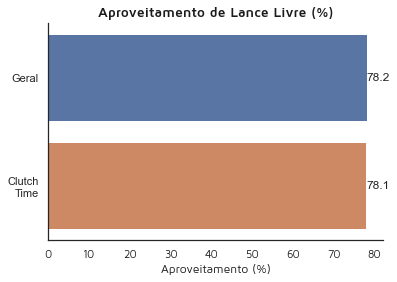

In [33]:
# Criando o gráfico
ax = sns.barplot(x='ft_percentage', y='aux', data=df_nba)
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color = 'k', fontname = 'Maven Pro')

# Títulos
ax.set_title("Aproveitamento de Lance Livre (%)", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("", color='k',fontname='Maven Pro')
ax.set_xlabel("Aproveitamento (%)", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

### Time

Por conta de como os dados estavam estruturados (jogadores trocados com dois times), nos limitamos aqui apenas a jogadores que tem algum lance livre tentado no *clutch time*.

In [34]:
# Vendo o aproveitamento geral dos times
df_times_geral = df_jogadores_ll_time.groupby('team')[['ft_made_season', 'total_ft_season']].sum()
df_times_geral['ft_percentage'] = df_times_geral['ft_made_season'] / df_times_geral['total_ft_season'] * 100

# Renomeando colunas
df_times_geral.rename(columns={'total_ft_season':'total_ft',
                              'ft_made_season':'ft_made'},
                    inplace=True)

df_times_geral.head()

,ft_made,total_ft,ft_percentage
team,,,
ATL,1334,1618,82.447466
BOS,1325,1614,82.094176
BRK,1814,2203,82.342261
CHI,1342,1599,83.927455
CHO,1395,1854,75.242718


In [35]:
# Vendo o aproveitamento no clutch time dos times
df_times_clutch = df_jogadores_ll_time.groupby('team')[['ft_made', 'total_ft']].sum()
df_times_clutch['ft_percentage'] = df_times_clutch['ft_made'] / df_times_clutch['total_ft'] * 100

df_times_clutch.head()

,ft_made,total_ft,ft_percentage
team,,,
ATL,97,125.0,77.600000
BOS,104,130.0,80.000000
BRK,78,104.0,75.000000
CHI,112,132.0,84.848485
CHO,82,115.0,71.304348


In [36]:
# Vendo a diferença de desempenho
df_times_clutch['ft_percentage_season'] = df_times_geral['ft_percentage']
df_times_clutch['diff'] = df_times_clutch['ft_percentage'] - df_times_geral['ft_percentage']

# Ordenando por diferença
df_times_clutch.sort_values(by='diff', ascending=False, inplace=True)

# Ajustando o index
df_times_clutch.reset_index(inplace=True)
df_times_clutch['team_ft'] = df_times_clutch['team'] + " (" + df_times_clutch['ft_made'].astype(str) + ")"
df_times_clutch.set_index('team_ft', inplace=True)

df_times_clutch.head()

,team,ft_made,total_ft,ft_percentage,ft_percentage_season,diff
team_ft,,,,,,
ORL (105),ORL,105,118.0,88.983051,78.201635,10.781416
LAC (98),LAC,98,118.0,83.050847,76.428909,6.621939
SAS (68),SAS,68,85.0,80.000000,75.331230,4.668770
MIL (71),MIL,71,91.0,78.021978,74.248120,3.773858
MEM (103),MEM,103,134.0,76.865672,74.111111,2.754561


/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/702925466.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


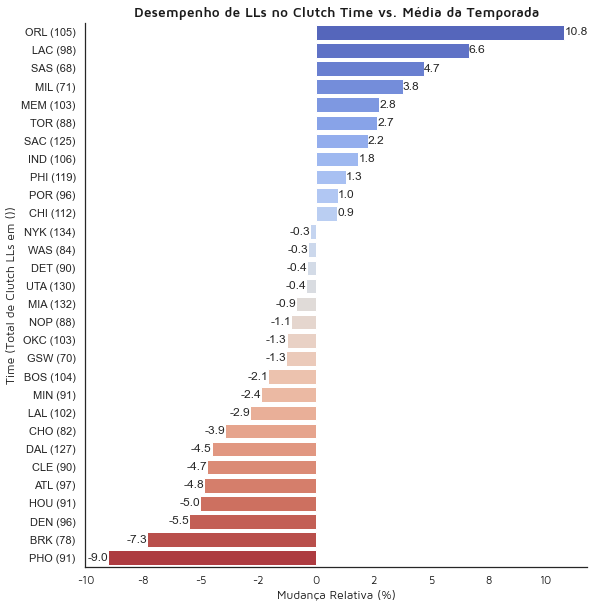

In [37]:
# Criando o gráfico de desempenho relativo
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='diff', y=df_times_clutch.index, data=df_times_clutch, palette="coolwarm")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("Desempenho de LLs no Clutch Time vs. Média da Temporada", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Time (Total de Clutch LLs em ())", color='k',fontname='Maven Pro')
ax.set_xlabel("Mudança Relativa (%)", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/622780814.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


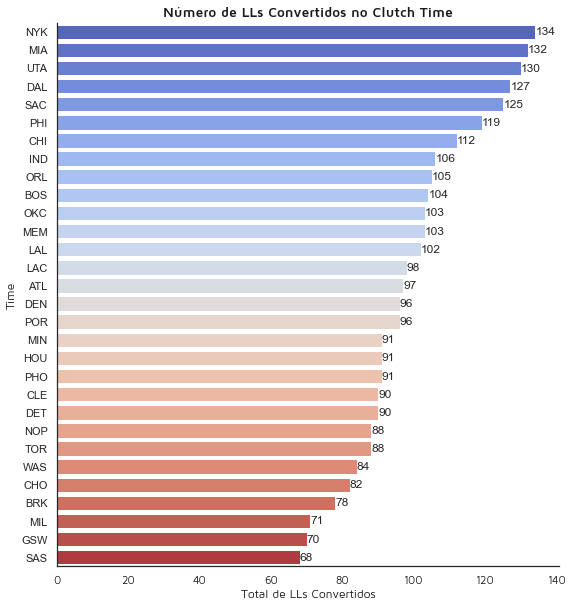

In [38]:
# Criando o gráfico de total
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_made', y='team', data=df_times_clutch.sort_values(by='ft_made', ascending=False),
                  palette="coolwarm")
ax.bar_label(ax.containers[0], fmt='%.0f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("Número de LLs Convertidos no Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Time", color='k',fontname='Maven Pro')
ax.set_xlabel("Total de LLs Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

### Dentro/Fora de Casa

In [39]:
# Vendo o aproveitamento no clutch time dos times dentro e fora de casa
df_times_clutch_away = pd.DataFrame(df_jogadores_ll_time[['ft_made_away', 'total_ft_away']].sum()).T
df_times_clutch_home = pd.DataFrame(df_jogadores_ll_time[['ft_made_home', 'total_ft_home']].sum()).T

df_times_clutch_away['ft_percentage'] = df_times_clutch_away['ft_made_away'] / df_times_clutch_away['total_ft_away'] * 100
df_times_clutch_home['ft_percentage'] = df_times_clutch_home['ft_made_home'] / df_times_clutch_home['total_ft_home'] * 100

In [40]:
# Renomeando colunas
df_times_clutch_away.rename(columns={'ft_made_away':'ft_made',
                                     'total_ft_away':'total_ft'},
                                     inplace=True)
df_times_clutch_home.rename(columns={'ft_made_home':'ft_made',
                                     'total_ft_home':'total_ft'},
                                     inplace=True)

# Auxiliar para ajustar index
df_times_clutch_away['index'] = ['Fora']
df_times_clutch_home['index'] = ['Em Casa']

df_times_clutch_away.set_index(['index'], inplace=True)
df_times_clutch_home.set_index(['index'], inplace=True)

# Juntando os DataFrames
df_times_clutch_home_away = pd.concat([df_times_clutch_home, df_times_clutch_away], axis=0)

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1257102895.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color = 'k', fontname = 'Maven Pro')


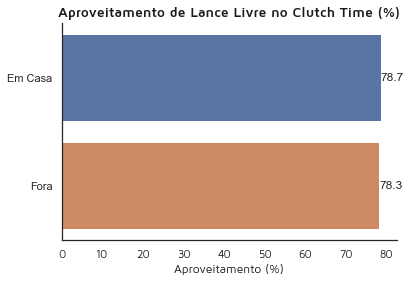

In [41]:
# Criando o gráfico
ax = sns.barplot(x='ft_percentage', y=df_times_clutch_home_away.index, data=df_times_clutch_home_away)
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color = 'k', fontname = 'Maven Pro')

# Títulos
ax.set_title("Aproveitamento de Lance Livre no Clutch Time (%)", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("", color='k',fontname='Maven Pro')
ax.set_xlabel("Aproveitamento (%)", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

### Perdendo ou Ganhando

In [42]:
# Vendo o aproveitamento no clutch time dos times dentro e fora de casa
df_times_clutch_losing = pd.DataFrame(df_jogadores_ll_time[['ft_made_losing', 'total_ft_losing']].sum()).T
df_times_clutch_tied_winning = pd.DataFrame(df_jogadores_ll_time[['ft_made_tied_winning', 'total_ft_tied_winning']].sum()).T

df_times_clutch_losing['ft_percentage'] = df_times_clutch_losing['ft_made_losing'] / df_times_clutch_losing['total_ft_losing'] * 100
df_times_clutch_tied_winning['ft_percentage'] = df_times_clutch_tied_winning['ft_made_tied_winning'] / df_times_clutch_tied_winning['total_ft_tied_winning'] * 100

In [43]:
# Renomeando colunas
df_times_clutch_losing.rename(columns={'ft_made_losing':'ft_made',
                                     'total_ft_losing':'total_ft'},
                                     inplace=True)
df_times_clutch_tied_winning.rename(columns={'ft_made_tied_winning':'ft_made',
                                     'total_ft_tied_winning':'total_ft'},
                                     inplace=True)

# Auxiliar para ajustar index
df_times_clutch_losing['index'] = ['Perdendo']
df_times_clutch_tied_winning['index'] = ['Empatando\nGanhando']

df_times_clutch_losing.set_index(['index'], inplace=True)
df_times_clutch_tied_winning.set_index(['index'], inplace=True)

# Juntando os DataFrames
df_times_clutch_win_lose = pd.concat([df_times_clutch_tied_winning, df_times_clutch_losing], axis=0)

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1682331949.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color = 'k', fontname = 'Maven Pro')


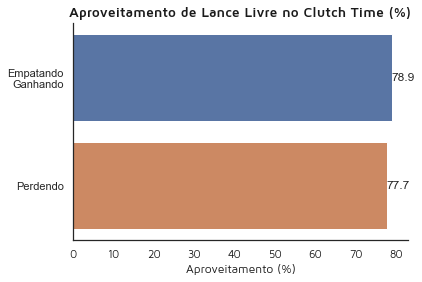

In [44]:
# Criando o gráfico
ax = sns.barplot(x='ft_percentage', y=df_times_clutch_win_lose.index, data=df_times_clutch_win_lose)
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color = 'k', fontname = 'Maven Pro')

# Títulos
ax.set_title("Aproveitamento de Lance Livre no Clutch Time (%)", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("", color='k',fontname='Maven Pro')
ax.set_xlabel("Aproveitamento (%)", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

## Por Jogador

Apenas aqueles com 41+ jogos e média de pelo menos um lance livre tentado por jogo. Além disso, com pelo menos 11 LLs tentados no clutch time (mediana da amostra inicial).

In [45]:
# Limitando a análise
df_jogadores_ll_final['ft_per_game'] = df_jogadores_ll_final['total_ft_season'] / df_jogadores_ll_final['games']
df_jogadores_ll_analise = df_jogadores_ll_final.query('ft_per_game >= 1 and games >= 41')
df_jogadores_ll_analise

,player_name,age,ft_made,total_ft,ft_made_away,total_ft_away,ft_made_home,total_ft_home,ft_made_losing,total_ft_losing,...,ft_percentage_season,total_ft_season,ft_made_season,games,ft_percentage,ft_percentage_away,ft_percentage_home,ft_percentage_losing,ft_percentage_tied_winning,ft_per_game
0,A. Burks,31,12,15.0,8.0,10.0,4.0,5.0,6.0,8.0,...,81.4,188,153,51,80.000000,80.000000,80.000000,75.000000,85.714286,3.686275
1,A. Caruso,28,1,2.0,0.0,0.0,1.0,2.0,1.0,2.0,...,80.8,73,59,67,50.000000,NaN,50.000000,50.000000,NaN,1.089552
2,A. Coffey,25,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,77.8,63,49,50,100.000000,NaN,100.000000,NaN,100.000000,1.260000
3,A. Davis,29,20,31.0,10.0,16.0,10.0,15.0,4.0,4.0,...,78.4,444,348,56,64.516129,62.500000,66.666667,100.000000,59.259259,7.928571
4,A. Dosunmu,23,3,4.0,2.0,2.0,1.0,2.0,1.0,2.0,...,80.5,82,66,80,75.000000,100.000000,50.000000,50.000000,100.000000,1.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,W. Kessler,21,6,13.0,1.0,1.0,5.0,12.0,1.0,5.0,...,51.6,159,82,74,46.153846,100.000000,41.666667,20.000000,62.500000,2.148649
297,X. Tillman,24,5,8.0,2.0,4.0,3.0,4.0,1.0,1.0,...,55.1,89,49,61,62.500000,50.000000,75.000000,100.000000,57.142857,1.459016
299,Z. Collins,25,12,17.0,9.0,14.0,3.0,3.0,3.0,5.0,...,76.1,142,108,63,70.588235,64.285714,100.000000,60.000000,75.000000,2.253968
300,Z. LaVine,27,29,33.0,17.0,18.0,12.0,15.0,15.0,18.0,...,84.8,428,363,77,87.878788,94.444444,80.000000,83.333333,93.333333,5.558442


Mediana: 11.0.
Média: 15.439130434782609.


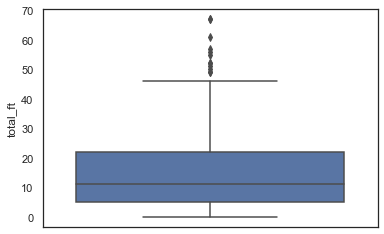

In [46]:
# Vendo distribuição do número de arremesos
sns.boxplot(y='total_ft', data=df_jogadores_ll_analise)
print(f"Mediana: {df_jogadores_ll_analise['total_ft'].median()}.")
print(f"Média: {df_jogadores_ll_analise['total_ft'].mean()}.")

In [47]:
# Escolhendo apenas os jogadores com um número relevante de LLs tentados no clutch time
df_jogadores_ll_analise = df_jogadores_ll_analise.query('total_ft >= 11').copy()

### Quem mais arremessou

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/410831655.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


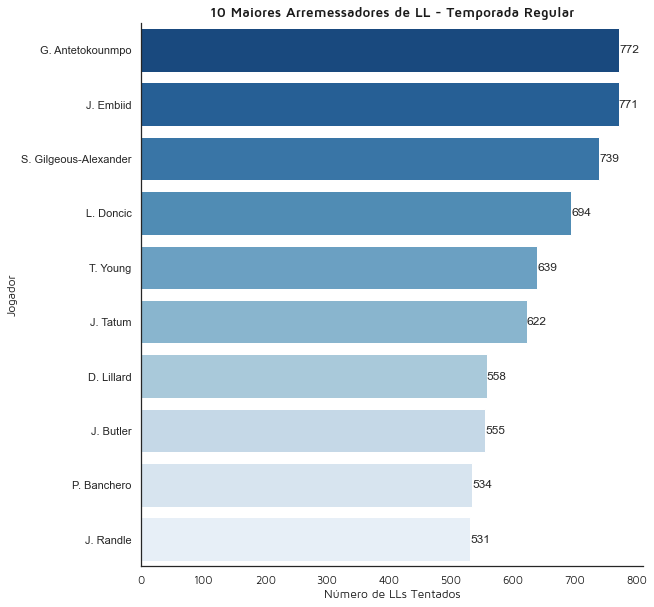

In [48]:
# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='total_ft_season', y='player_name', 
                 data=df_jogadores_ll_analise.sort_values(by='total_ft_season', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.0f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Maiores Arremessadores de LL - Temporada Regular", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador", color='k',fontname='Maven Pro')
ax.set_xlabel("Número de LLs Tentados", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/2896199428.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


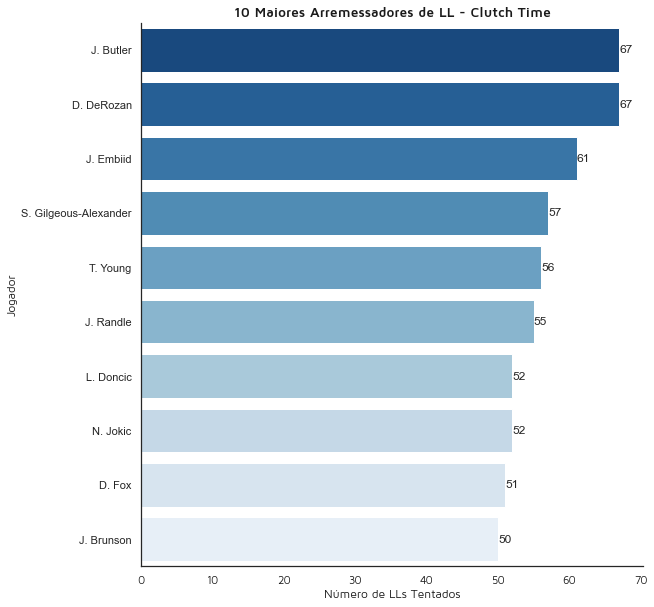

In [49]:
# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='total_ft', y='player_name', 
                 data=df_jogadores_ll_analise.sort_values(by='total_ft', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.0f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Maiores Arremessadores de LL - Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador", color='k',fontname='Maven Pro')
ax.set_xlabel("Número de LLs Tentados", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

### Melhores e Piores Arremessadores

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/2687538649.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


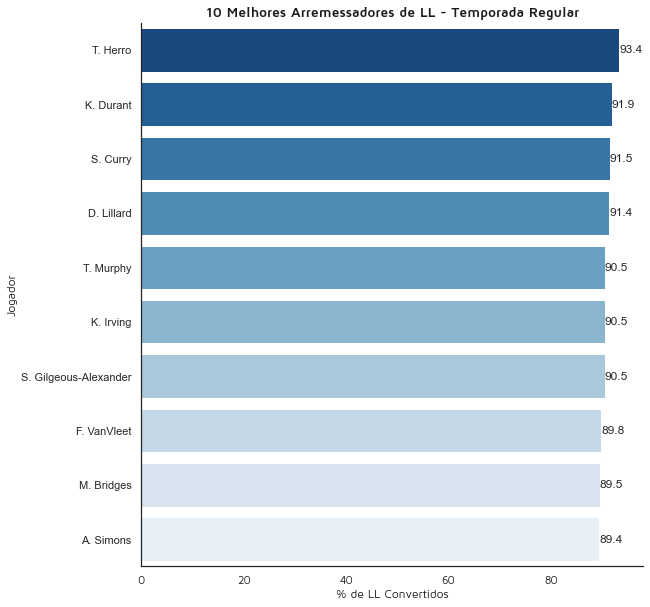

In [50]:
# Melhores arremessadores de LL na temporada

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage_season', y='player_name', 
                 data=df_jogadores_ll_analise.sort_values(by='ft_percentage_season', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Melhores Arremessadores de LL - Temporada Regular", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/492144554.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


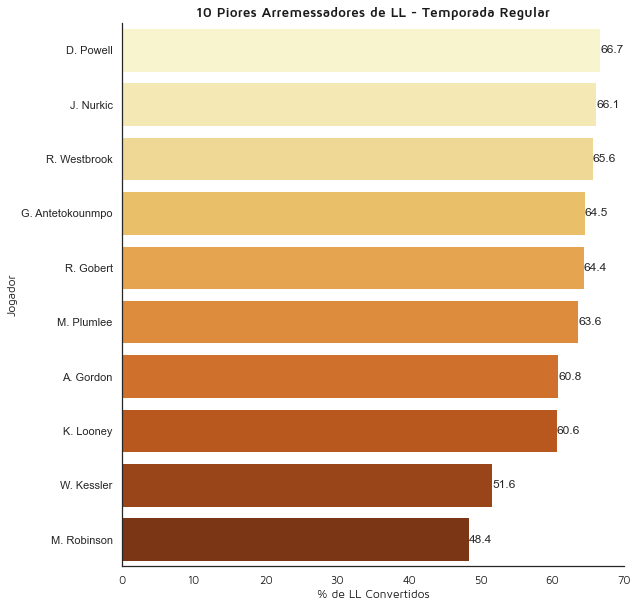

In [51]:
# Piores arremessadores de LL na temporada

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage_season', y='player_name', 
                 data=df_jogadores_ll_analise.sort_values(by='ft_percentage_season', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Piores Arremessadores de LL - Temporada Regular", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

In [52]:
# Criando coluna auxiliar para indicar total de lances livres tentados no clutch time
df_jogadores_ll_analise['player_name_total_ft'] = df_jogadores_ll_analise['player_name'] + ' (' + df_jogadores_ll_analise['total_ft'].astype(int).astype(str) + ')'

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/134761233.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


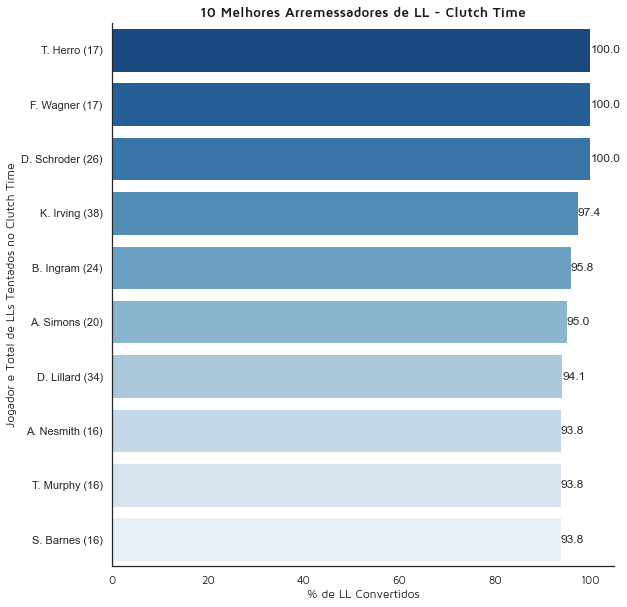

In [53]:
# Melhores arremessadores de LL no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage', y='player_name_total_ft', 
                 data=df_jogadores_ll_analise.sort_values(by='ft_percentage', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Melhores Arremessadores de LL - Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1231767019.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


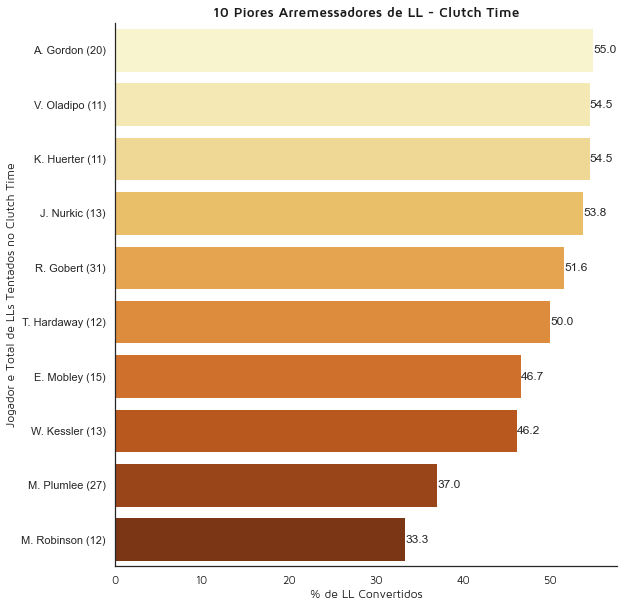

In [54]:
# Piores arremessadores de LL no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage', y='player_name_total_ft', 
                 data=df_jogadores_ll_analise.sort_values(by='ft_percentage', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Piores Arremessadores de LL - Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

In [55]:
# Calculando diferença
df_jogadores_ll_analise['diff'] = df_jogadores_ll_analise['ft_percentage'] - df_jogadores_ll_analise['ft_percentage_season']

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1826941607.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


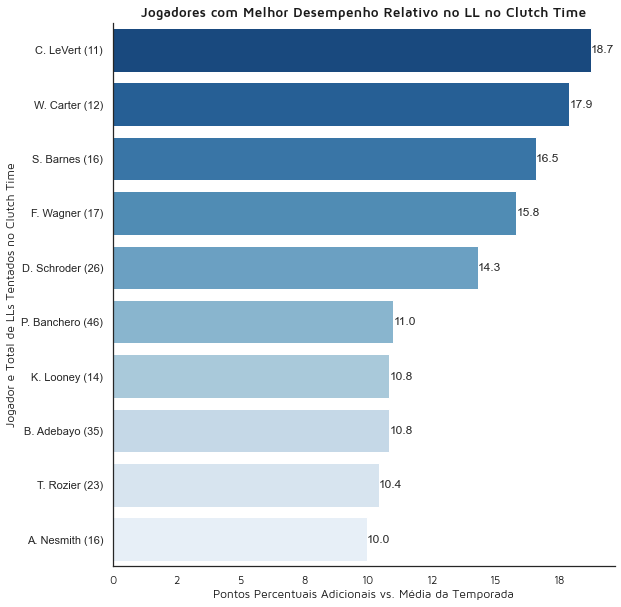

In [56]:
# Melhor desempenho relativo no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='diff', y='player_name_total_ft', 
                 data=df_jogadores_ll_analise.sort_values(by='diff', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("Jogadores com Melhor Desempenho Relativo no LL no Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("Pontos Percentuais Adicionais vs. Média da Temporada", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1783751364.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


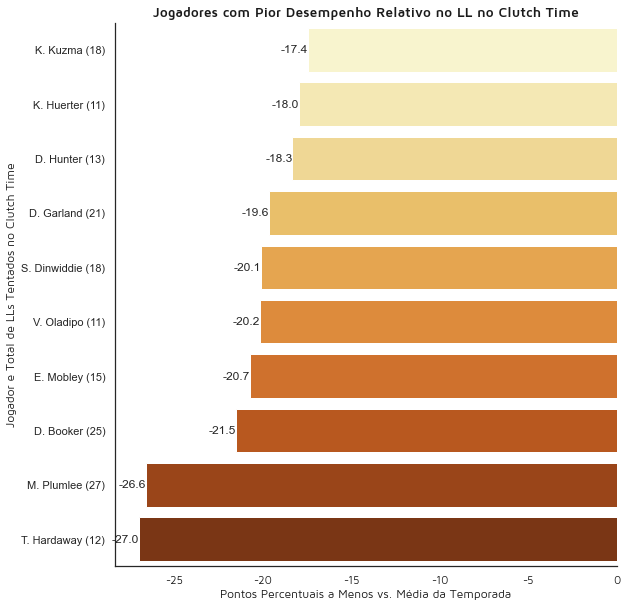

In [57]:
# Pior desempenho relativo no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='diff', y='player_name_total_ft', 
                 data=df_jogadores_ll_analise.sort_values(by='diff', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("Jogadores com Pior Desempenho Relativo no LL no Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("Pontos Percentuais a Menos vs. Média da Temporada", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

## Jogadores que Receberam +1 Voto para All-NBA

In [58]:
# Jogadores que receberam votos para All-NBA
# https://ak-static.cms.nba.com/wp-content/uploads/sites/46/2023/05/2022-23-Kia-All-NBA-Voting-Results-1.pdf
lista_all_nba = ['G. Antetokounmpo', 'J. Tatum', 'J. Embiid', 'S. Gilgeous-Alexander', 'L. Doncic',
                 'N. Jokic', 'D. Mitchell', 'S. Curry', 'J. Butler', 'J. Brown',
                 'D. Sabonis', 'D. Fox', 'D. Lillard', 'J. Randle', 'L. James',
                 'J. Morant', 'J. Holiday', 'J. Brunson', 'D. Booker', 'J. Harden', 'T. Haliburton', 'T. Young',
                 'L. Markkanen', 'K. Durant', 'P. Siakam', 'K. Leonard', 'A. Edwards', 'J. Jackson', 'D. DeRozan',
                 'M. Bridges', 'P. George', 'Z. LaVine', 'A. Davis', 'B. Adebayo', 'K. Porzingis', 'B. Lopez']

# Filtrando
df_jogadores_ll_allnba = df_jogadores_ll_analise.query('player_name in @lista_all_nba').copy()

Mediana: 35.0.
Média: 38.31428571428572.


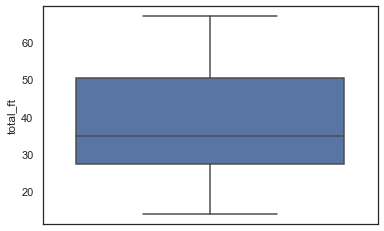

In [59]:
# Vendo distribuição do número de arremesos
sns.boxplot(y='total_ft', data=df_jogadores_ll_allnba)
print(f"Mediana: {df_jogadores_ll_allnba['total_ft'].median()}.")
print(f"Média: {df_jogadores_ll_allnba['total_ft'].mean()}.")

### Desempenho Geral no Clutch Time

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/3955059557.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


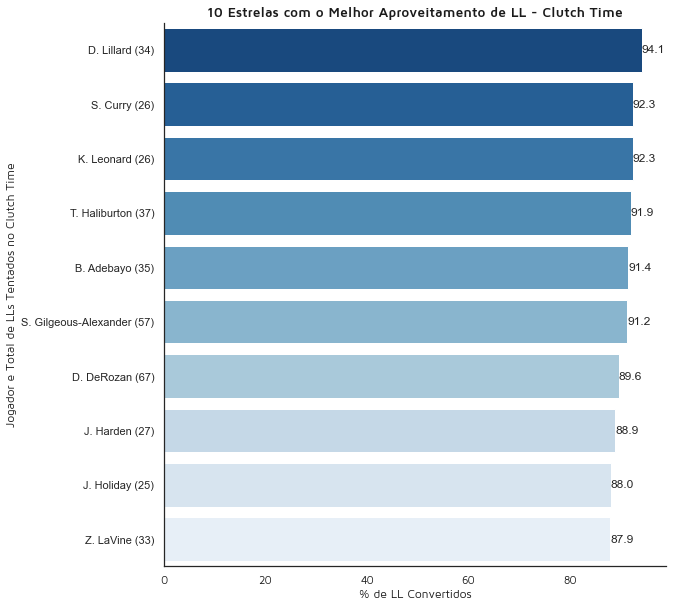

In [60]:
# Melhores estrelas arremessadores de LL no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage', y='player_name_total_ft', 
                 data=df_jogadores_ll_allnba.sort_values(by='ft_percentage', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Melhor Aproveitamento de LL - Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/2368019640.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


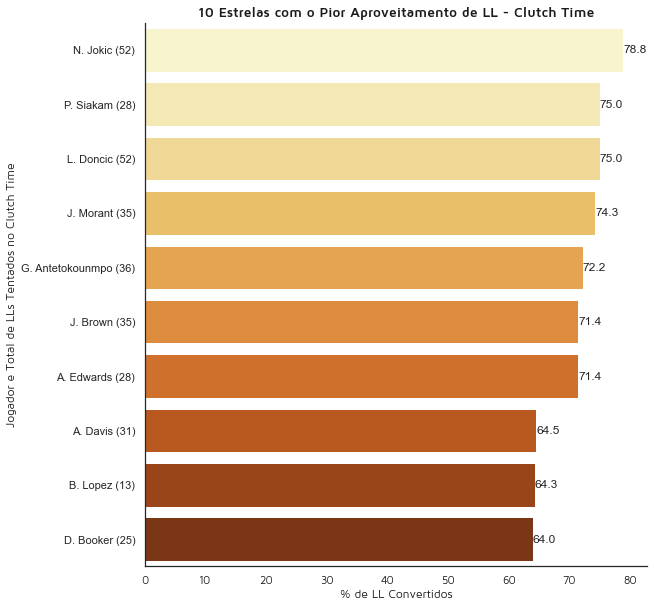

In [61]:
# Piores estrelas arremessadores de LL no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage', y='player_name_total_ft', 
                 data=df_jogadores_ll_allnba.sort_values(by='ft_percentage', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Pior Aproveitamento de LL - Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/668911931.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


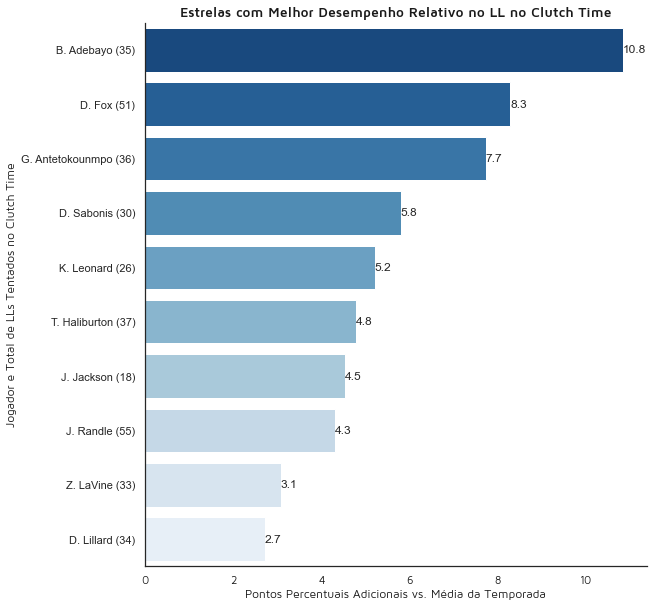

In [62]:
# Melhor desempenho relativo no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='diff', y='player_name_total_ft', 
                 data=df_jogadores_ll_allnba.sort_values(by='diff', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("Estrelas com Melhor Desempenho Relativo no LL no Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("Pontos Percentuais Adicionais vs. Média da Temporada", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1195092769.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


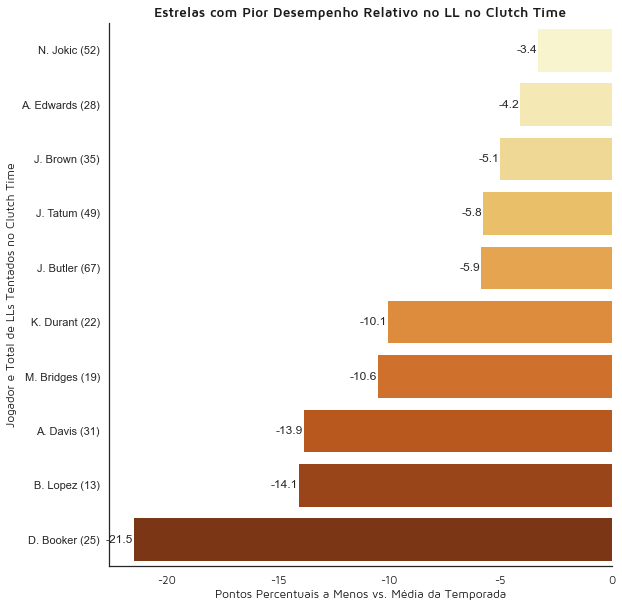

In [63]:
# Pior desempenho relativo no clutch time

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='diff', y='player_name_total_ft', 
                 data=df_jogadores_ll_allnba.sort_values(by='diff', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("Estrelas com Pior Desempenho Relativo no LL no Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("Pontos Percentuais a Menos vs. Média da Temporada", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

### Ganhando ou Perdendo?

Melhores e piores, maiores mudanças entre ganhando x perdendo no *clutch time*.

In [64]:
# Criando colunas auxiliares
## Nome dos jogadores com total de arremessos
df_jogadores_ll_allnba['player_name_total_ft_losing'] = df_jogadores_ll_allnba['player_name'] + ' (' + \
    df_jogadores_ll_analise['total_ft_losing'].astype(int).astype(str) + ')'
df_jogadores_ll_allnba['player_name_total_ft_tied_winning'] = df_jogadores_ll_allnba['player_name'] + ' (' + \
    df_jogadores_ll_allnba['total_ft_tied_winning'].astype(int).astype(str) + ')'

## Diferenças entre ganhando/perdendo
df_jogadores_ll_allnba['diff_losing'] = df_jogadores_ll_allnba['ft_percentage_losing'] - df_jogadores_ll_allnba['ft_percentage_tied_winning']

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/2177347797.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


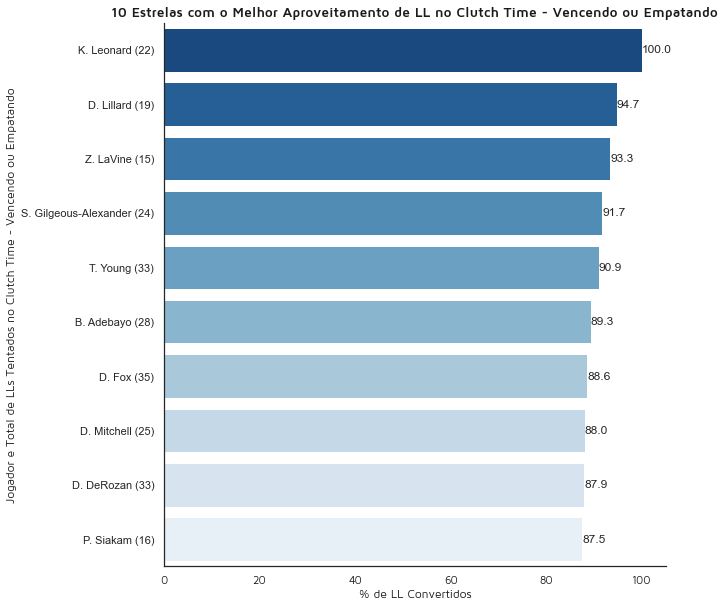

In [65]:
# Estrelas com o melhor aproveitamento de lance livre no clutch time quando ganhando ou empatando

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage_tied_winning', y='player_name_total_ft_tied_winning', 
                 data=df_jogadores_ll_allnba.sort_values(by='ft_percentage_tied_winning', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Melhor Aproveitamento de LL no Clutch Time - Vencendo ou Empatando", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time - Vencendo ou Empatando", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1578900661.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


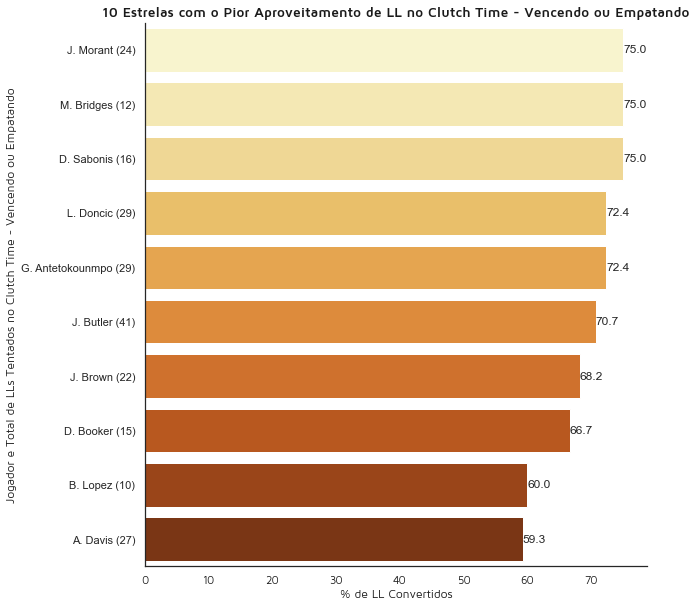

In [66]:
# Estrelas com o pior aproveitamento de lance livre no clutch time quando ganhando ou empatando

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage_tied_winning', y='player_name_total_ft_tied_winning', 
                 data=df_jogadores_ll_allnba.sort_values(by='ft_percentage_tied_winning', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Pior Aproveitamento de LL no Clutch Time - Vencendo ou Empatando", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time - Vencendo ou Empatando", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/401215309.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


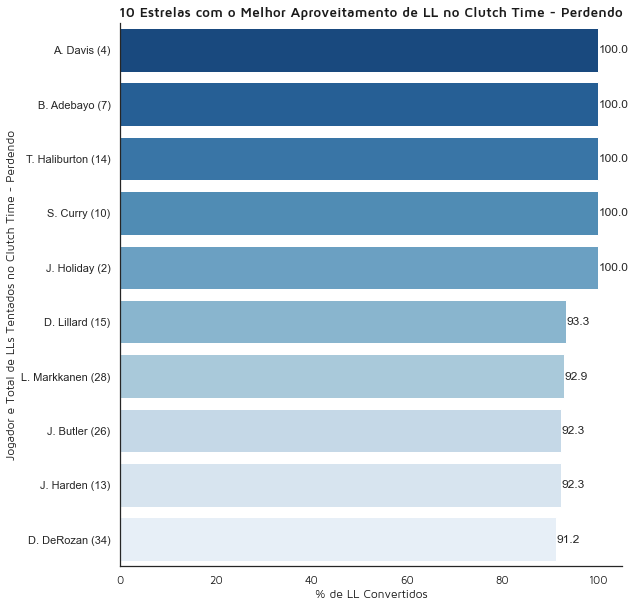

In [67]:
# Estrelas com o melhor aproveitamento de lance livre no clutch time quando perdendo

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage_losing', y='player_name_total_ft_losing', 
                 data=df_jogadores_ll_allnba.sort_values(by='ft_percentage_losing', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Melhor Aproveitamento de LL no Clutch Time - Perdendo", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time - Perdendo", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/3522040130.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


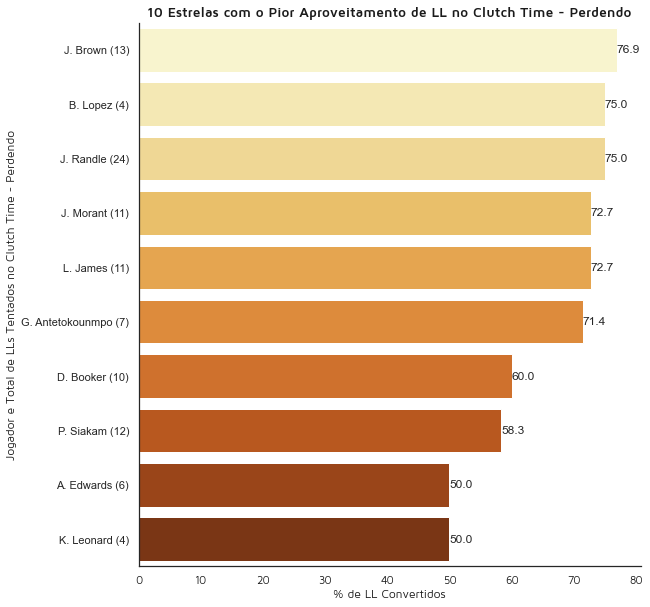

In [68]:
# Estrelas com o pior aproveitamento de lance livre no clutch time quando perdendo

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='ft_percentage_losing', y='player_name_total_ft_losing', 
                 data=df_jogadores_ll_allnba.sort_values(by='ft_percentage_losing', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Pior Aproveitamento de LL no Clutch Time - Perdendo", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time - Perdendo", color='k',fontname='Maven Pro')
ax.set_xlabel("% de LL Convertidos", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/1335486022.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


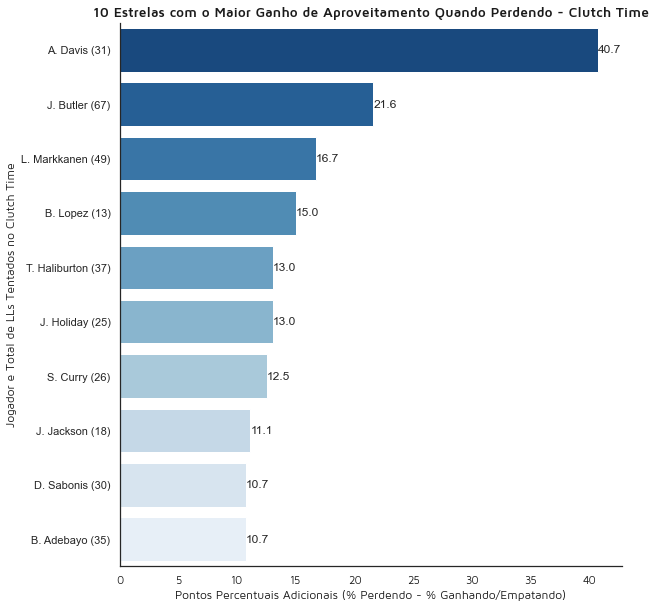

In [69]:
# Estrelas com o melhor aproveitamento relativo de lance livre

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='diff_losing', y='player_name_total_ft', 
                 data=df_jogadores_ll_allnba.sort_values(by='diff_losing', ascending=False).head(10), 
                 palette="Blues_r")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Maior Ganho de Aproveitamento Quando Perdendo - Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("Pontos Percentuais Adicionais (% Perdendo - % Ganhando/Empatando)", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_2618/2364223344.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(formato, color='k', fontname='Maven Pro')


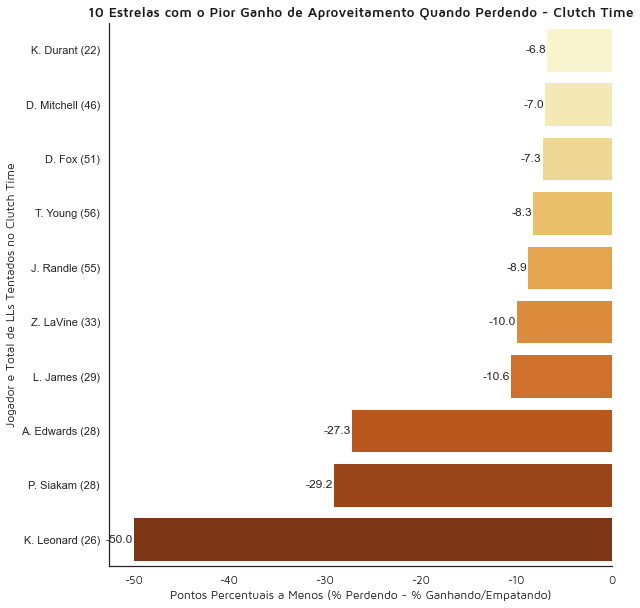

In [70]:
# Estrelas com o pior aproveitamento relativo de lance livre

# Criando o gráfico
fig, ax = plt.subplots(figsize=(9, 10))
ax = sns.barplot(x='diff_losing', y='player_name_total_ft', 
                 data=df_jogadores_ll_allnba.sort_values(by='diff_losing', ascending=False).tail(10), 
                 palette="YlOrBr")
ax.bar_label(ax.containers[0], fmt='%.1f')

# Formatando o eixo x como percentual
formato = ['{:,.0f}'.format(y).replace(',', '.') for y in ax.get_xticks()]
ax.set_xticklabels(formato, color='k', fontname='Maven Pro')

# Títulos
ax.set_title("10 Estrelas com o Pior Ganho de Aproveitamento Quando Perdendo - Clutch Time", color='k',
             fontname='Maven Pro', fontsize=14, fontweight='bold')
ax.set_ylabel("Jogador e Total de LLs Tentados no Clutch Time", color='k',fontname='Maven Pro')
ax.set_xlabel("Pontos Percentuais a Menos (% Perdendo - % Ganhando/Empatando)", color='k',fontname='Maven Pro')

## deixando apenas as linhas dos eixos e arrumando a largura das linhas
sns.despine()

# Exportando

In [71]:
# Dados de jogadores com os times
df_jogadores_ll_time.to_excel(f'{caminho_dados}output/data_players_teams.xlsx')

# Dados de jogadores consolidados
df_jogadores_ll_analise.to_excel(f'{caminho_dados}output/data_players.xlsx')

# Dados de all_nba
df_jogadores_ll_allnba.to_excel(f'{caminho_dados}output/data_players_allnba.xlsx')